<a href="https://colab.research.google.com/github/Aaravthebest123/Class-80/blob/main/AppleStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.3699 - val_loss: 0.1426
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0368 - val_loss: 0.0181
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0179 - val_loss: 0.0546
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0094 - val_loss: 0.0311
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0080 - val_loss: 0.0429
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0073 - val_loss: 0.0338
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0065 - val_loss: 0.0423
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0070 - val_loss: 0.0336
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0067 - val_loss: 0.0382
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0067 - val_loss: 0.0359
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0076 - val_loss: 0.0361
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0

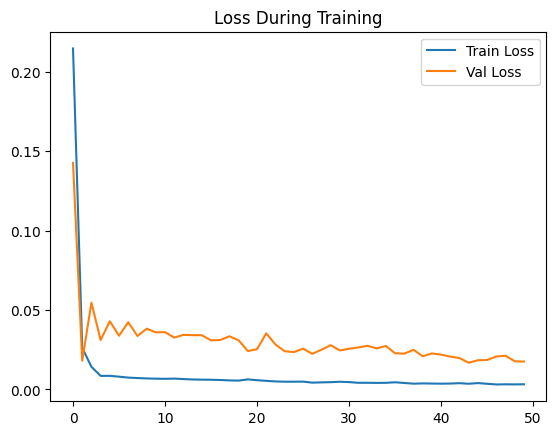

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


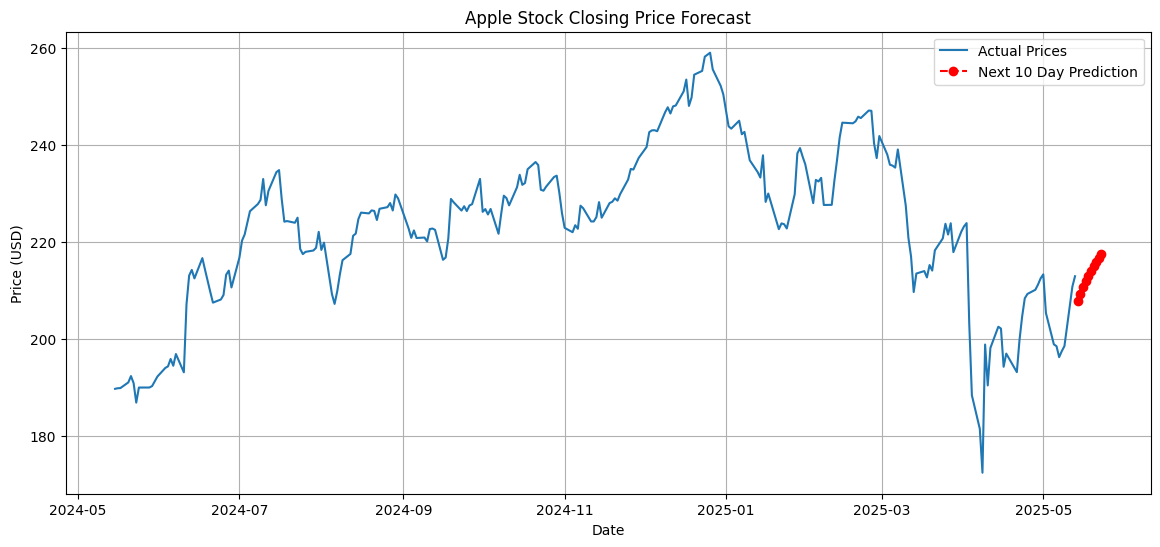

Predicted Close Prices for Next 10 Days:
2025-05-14: $207.89
2025-05-15: $209.32
2025-05-16: $210.65
2025-05-17: $211.88
2025-05-18: $213.03
2025-05-19: $214.09
2025-05-20: $215.06
2025-05-21: $215.95
2025-05-22: $216.76
2025-05-23: $217.51


In [1]:
# ----------------------------------------
# 📦 IMPORT REQUIRED MODULES
# ----------------------------------------

import numpy as np                            # Used for numerical operations and arrays
import pandas as pd                           # For reading and manipulating data tables
import matplotlib.pyplot as plt               # For plotting graphs
import tensorflow as tf                       # Main deep learning library (includes Keras)
from tensorflow.keras.models import Sequential       # To create a linear model layer by layer
from tensorflow.keras.layers import LSTM, Dense      # LSTM = good for sequence data, Dense = output layer
from sklearn.preprocessing import MinMaxScaler       # To normalize data between 0 and 1
from google.colab import files                        # For uploading CSV file in Colab

# ----------------------------------------
# 📂 UPLOAD FILE
# ----------------------------------------

# Replace this filename with your actual file name if different
filename = "AppleStock - Sheet1 (1).csv"

# ----------------------------------------
# 📊 LOAD AND CLEAN DATA
# ----------------------------------------

df = pd.read_csv(filename)                    # Reads the CSV file into a DataFrame
df.columns = df.columns.str.strip()           # Removes extra whitespace from column headers

df = df[['Date', 'Close']].dropna()           # Keeps only the 'Date' and 'Close' columns, and drops any missing data

df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Ensures 'Close' column is numeric
df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')  # Converts 'Date' column to datetime format

df = df.sort_values('Date').reset_index(drop=True)  # Sorts the data chronologically

# ----------------------------------------
# 🔄 NORMALIZE CLOSE PRICES
# ----------------------------------------

scaler = MinMaxScaler()                       # Creates a scaler to normalize data to [0, 1]
                                              # Using a scaler like MinMaxScaler helps because we're feeding the data into a neural network (LSTM),
                                              # which is very sensitive to the scale and range of input values.


scaled_close = scaler.fit_transform(df[['Close']])  # Normalizes 'Close' prices

# ----------------------------------------
# 🧩 CREATE SEQUENCES FOR LSTM
# ----------------------------------------

def create_sequences(data, seq_length):
    X, y = [], []                             # X = sequences, y = labels
    for i in range(seq_length, len(data)):    # Loop over the data with a sliding window
        X.append(data[i - seq_length:i])      # Take previous `seq_length` prices
        y.append(data[i])                     # Predict the next price after the sequence
    return np.array(X), np.array(y)           # Return as numpy arrays

SEQ_LENGTH = 20                               # Length of the sequence (days of history used to predict next day)
X, y = create_sequences(scaled_close, SEQ_LENGTH)  # Create X and y using the function

X = X.reshape((X.shape[0], X.shape[1], 1))    # Reshape X to fit LSTM input shape: [samples, time steps, features]

# ----------------------------------------
# 🧪 SPLIT INTO TRAIN AND TEST SET
# ----------------------------------------

split = int(len(X) * 0.8)                     # 80% of data for training, 20% for testing
X_train, X_test = X[:split], X[split:]        # Split the input sequences
y_train, y_test = y[:split], y[split:]        # Split the corresponding labels

# ----------------------------------------
# 🧠 BUILD LSTM MODEL
# ----------------------------------------

model = Sequential([                          # Start a sequential model
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),  # First LSTM layer (returns sequences)
    LSTM(50),                                  # Second LSTM layer
    Dense(1)                                   # Output layer with 1 neuron (predicting 1 value: the price)
])

model.compile(optimizer='adam', loss='mse')    # Compile model with Adam optimizer and Mean Squared Error loss
model.summary()                                # Print model summary to see layers and parameters

# ----------------------------------------
# 🏋️‍♂️ TRAIN THE MODEL
# ----------------------------------------

history = model.fit(
    X_train, y_train,                          # Training data
    epochs=50,                                 # Number of full passes through the training data
    batch_size=16,                             # Number of samples per gradient update
    validation_data=(X_test, y_test),          # Validate the model on unseen test data
    verbose=1                                  # Show progress during training
)

# ----------------------------------------
# 📈 PLOT TRAINING HISTORY
# ----------------------------------------

plt.plot(history.history['loss'], label='Train Loss')         # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Val Loss')       # Plot validation loss over epochs
plt.title("Loss During Training")                             # Title of the graph
plt.legend()                                                  # Show legend
plt.show()                                                    # Display the graph

# ----------------------------------------
# 🔮 PREDICT NEXT 10 DAYS
# ----------------------------------------

last_seq = scaled_close[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, 1)  # Get the last sequence from the dataset
future_preds = []                                             # Initialize list to store predictions

for _ in range(10):                                           # Predict next 10 days
    pred = model.predict(last_seq)[0][0]                      # Predict next day's normalized price
    future_preds.append(pred)                                 # Save prediction
    last_seq = np.append(last_seq[:, 1:, :], [[[pred]]], axis=1)  # Slide window and append new prediction

future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))  # Convert predictions back to real prices

# ----------------------------------------
# 📉 PLOT PREDICTIONS
# ----------------------------------------

plt.figure(figsize=(14, 6))                                  # Set figure size
plt.plot(df['Date'], df['Close'], label='Actual Prices')     # Plot historical actual prices

future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10)  # Generate next 10 dates
plt.plot(future_dates, future_preds, 'ro--', label='Next 10 Day Prediction')  # Plot predicted prices

plt.title("Apple Stock Closing Price Forecast")              # Title of the plot
plt.xlabel("Date")                                           # Label x-axis
plt.ylabel("Price (USD)")                                    # Label y-axis
plt.legend()                                                 # Show legend
plt.grid(True)                                               # Add gridlines
plt.show()                                                   # Show plot

# ----------------------------------------
# 🖨️ PRINT PREDICTED PRICES
# ----------------------------------------

print("Predicted Close Prices for Next 10 Days:")            # Header
for date, price in zip(future_dates, future_preds.flatten()):  # Loop over dates and prices
    print(f"{date.strftime('%Y-%m-%d')}: ${price:.2f}")       # Print each predicted date and price
